# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import urllib
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
api_key = "e156922283ce56cfc0a2343a1f924d89"

url = "http://api.openweathermap.org/data/2.5/find?units=Imperial&APPID=" + api_key
print(url)

http://api.openweathermap.org/data/2.5/find?units=Imperial&APPID=e156922283ce56cfc0a2343a1f924d89


In [25]:
tempurl=f"http://api.openweathermap.org/data/2.5/find?q={cities[0]}&appid={api_key}"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="+cities[1]
requests.get(query_url).json()

{'coord': {'lon': -156.7887, 'lat': 71.2906},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 28.42,
  'feels_like': 15.82,
  'temp_min': 28.42,
  'temp_max': 28.42,
  'pressure': 1019,
  'humidity': 93},
 'visibility': 4828,
 'wind': {'speed': 18.41, 'deg': 90},
 'clouds': {'all': 90},
 'dt': 1623075440,
 'sys': {'type': 1, 'id': 7649, 'country': 'US', 'sunrise': 0, 'sunset': 0},
 'timezone': -28800,
 'id': 5880054,
 'name': 'Barrow',
 'cod': 200}

In [4]:
#List of city data
city_data = []


In [37]:
# Print to logger
print("Beginning Data Retrieval")
print("------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in the list
for i, city in enumerate(cities): 
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    #Create endpoint URL with each city
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    city_url = f"{url}appid={weather_api_key}&units={units}&q="+city
    
    # Log the url, record and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    print(city_url)
    
    #Add 1 to the record count
    record_count +=1
    
    #Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        
        #Parse out the next temp, humidity, cloudiness, and wind speed
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        print(city_weather)
        
        #Append the city information into city_data
        city_data.append({"City" : city,
                          "Lat" : city_lat,
                          "Lng" : city_lng,
                          "Max Temp" : city_max_temp,
                          "Humidity" : city_humidity,
                          "Cloudiness" : city_clouds,
                          "Wind Speed" : city_wind,
                          "Country" : city_country,
                          "Date" : city_date})
       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=barrow
{'coord': {'lon': -156.7887, 'lat': 71.2906}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 28.42, 'feels_like': 15.82, 'temp_min': 28.42, 'temp_max': 28.42, 'pressure': 1019, 'humidity': 93}, 'visibility': 4828, 'wind': {'speed': 18.41, 'deg': 90}, 'clouds': {'all': 90}, 'dt': 1623076122, 'sys': {'type': 1, 'id': 7649, 'country': 'US', 'sunrise': 0, 'sunset': 0}, 'timezone': -28800, 'id': 5880054, 'name': 'Barrow', 'cod': 200}
Processing Record 3 of Set 1 | pisco
http://

{'coord': {'lon': 103.2064, 'lat': 35.6003}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 58.48, 'feels_like': 57.13, 'temp_min': 58.48, 'temp_max': 58.48, 'pressure': 1011, 'humidity': 66, 'sea_level': 1011, 'grnd_level': 812}, 'visibility': 10000, 'wind': {'speed': 5.26, 'deg': 286, 'gust': 5.64}, 'clouds': {'all': 39}, 'dt': 1623076455, 'sys': {'country': 'CN', 'sunrise': 1623016297, 'sunset': 1623068440}, 'timezone': 28800, 'id': 1803331, 'name': 'Linxia Chengguanzhen', 'cod': 200}
Processing Record 15 of Set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=jamestown
{'coord': {'lon': -79.2353, 'lat': 42.097}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.55, 'feels_like': 79.39, 'temp_min': 75.85, 'temp_max': 81.01, 'pressure': 1019, 'humidity': 

{'coord': {'lon': -73.8203, 'lat': -41.8697}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 47.82, 'feels_like': 41.52, 'temp_min': 45.93, 'temp_max': 48.22, 'pressure': 1012, 'humidity': 83, 'sea_level': 1012, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 16.37, 'deg': 22, 'gust': 31.12}, 'clouds': {'all': 100}, 'dt': 1623076458, 'sys': {'type': 2, 'id': 2033614, 'country': 'CL', 'sunrise': 1623068258, 'sunset': 1623101462}, 'timezone': -14400, 'id': 3899695, 'name': 'Ancud', 'cod': 200}
Processing Record 29 of Set 1 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=saldanha
{'coord': {'lon': 17.9442, 'lat': -33.0117}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.45, 'feels_like': 82.36, 'temp_min': 82.45, 'temp_max': 82.45, 'pressure': 10

{'coord': {'lon': -159.775, 'lat': -21.2078}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68.05, 'feels_like': 68.18, 'temp_min': 68.05, 'temp_max': 68.05, 'pressure': 1014, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 140}, 'clouds': {'all': 36}, 'dt': 1623076461, 'sys': {'type': 1, 'id': 7271, 'country': 'CK', 'sunrise': 1623085912, 'sunset': 1623125072}, 'timezone': -36000, 'id': 4035715, 'name': 'Avarua', 'cod': 200}
Processing Record 42 of Set 1 | certeze
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=certeze
{'coord': {'lon': 23.4667, 'lat': 47.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 72.07, 'feels_like': 71.94, 'temp_min': 70.14, 'temp_max': 72.37, 'pressure': 1016, 'humidity': 63, 'sea_level': 1016, 'grnd_level': 985}, 'visi

{'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 69.96, 'feels_like': 71.37, 'temp_min': 69.96, 'temp_max': 69.96, 'pressure': 1011, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1623076465, 'sys': {'type': 1, 'id': 7285, 'country': 'TO', 'sunrise': 1623176035, 'sunset': 1623215176}, 'timezone': 46800, 'id': 4032243, 'name': 'Vaini', 'cod': 200}
Processing Record 5 of Set 2 | miandrivazo
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=miandrivazo
{'coord': {'lon': 45.4667, 'lat': -19.5167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 79.05, 'feels_like': 79.05, 'temp_min': 79.05, 'temp_max': 79.05, 'pressure': 1017, 'humidity': 39, 'sea_level': 1017, 'grnd_level': 1006}, 'vis

{'coord': {'lon': 8.9881, 'lat': 13.8072}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 104.49, 'feels_like': 100.15, 'temp_min': 104.49, 'temp_max': 104.49, 'pressure': 1005, 'humidity': 13, 'sea_level': 1005, 'grnd_level': 956}, 'visibility': 10000, 'wind': {'speed': 8.81, 'deg': 44, 'gust': 11.36}, 'clouds': {'all': 48}, 'dt': 1623076468, 'sys': {'country': 'NE', 'sunrise': 1623041739, 'sunset': 1623088229}, 'timezone': 3600, 'id': 2437798, 'name': 'Zinder', 'cod': 200}
Processing Record 18 of Set 2 | khorixas
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=khorixas
{'coord': {'lon': 14.9667, 'lat': -20.3667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.13, 'feels_like': 76.73, 'temp_min': 78.13, 'temp_max': 78.13, 'pressure': 1013, 'humidity': 23, 'sea_level': 10

{'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 39.65, 'feels_like': 37.4, 'temp_min': 39.65, 'temp_max': 39.65, 'pressure': 1010, 'humidity': 89, 'sea_level': 1010, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 3.51, 'deg': 22, 'gust': 3.49}, 'clouds': {'all': 6}, 'dt': 1623076471, 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -10800, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
Processing Record 31 of Set 2 | portel
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=portel
{'coord': {'lon': -50.8211, 'lat': -1.9356}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86.5, 'feels_like': 92.86, 'temp_min': 86.5, 'temp_max': 86.5, 'pressure': 1012, 'humidity': 62, 'sea_level': 1012, 'grnd_level': 1011}, 'visi

{'coord': {'lon': 101.7128, 'lat': 26.5851}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.01, 'feels_like': 74.88, 'temp_min': 74.01, 'temp_max': 74.01, 'pressure': 1007, 'humidity': 80, 'sea_level': 1007, 'grnd_level': 888}, 'visibility': 10000, 'wind': {'speed': 2.86, 'deg': 74, 'gust': 3.85}, 'clouds': {'all': 98}, 'dt': 1623076474, 'sys': {'country': 'CN', 'sunrise': 1623017973, 'sunset': 1623067481}, 'timezone': 28800, 'id': 6929460, 'name': 'Panzhihua', 'cod': 200}
Processing Record 44 of Set 2 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=cape town
{'coord': {'lon': 18.4232, 'lat': -33.9258}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 79.41, 'feels_like': 79.41, 'temp_min': 78.1, 'temp_max': 81.01, 'pressure': 1009, 'humidity': 17}, 'visibility':

{'coord': {'lon': 71.7189, 'lat': 40.4272}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 90.32, 'feels_like': 87.31, 'temp_min': 90.32, 'temp_max': 90.82, 'pressure': 1007, 'humidity': 25}, 'visibility': 10000, 'wind': {'speed': 18.41, 'deg': 330}, 'clouds': {'all': 100}, 'dt': 1623076477, 'sys': {'type': 1, 'id': 9014, 'country': 'UZ', 'sunrise': 1623022997, 'sunset': 1623076856}, 'timezone': 18000, 'id': 1513491, 'name': 'Yangi Marg`ilon', 'cod': 200}
Processing Record 7 of Set 3 | pedernales
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=pedernales
{'coord': {'lon': -71.744, 'lat': 18.0384}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86.59, 'feels_like': 89.74, 'temp_min': 86.59, 'temp_max': 86.59, 'pressure': 1016, 'humidity': 53, 'sea_level': 1016, 'grnd_le

{'coord': {'lon': -50.2056, 'lat': -30.1811}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.36, 'feels_like': 63.99, 'temp_min': 64.36, 'temp_max': 64.36, 'pressure': 1022, 'humidity': 74, 'sea_level': 1022, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 15.57, 'deg': 72, 'gust': 22.3}, 'clouds': {'all': 100}, 'dt': 1623076481, 'sys': {'country': 'BR', 'sunrise': 1623060728, 'sunset': 1623097656}, 'timezone': -10800, 'id': 3466165, 'name': 'Cidreira', 'cod': 200}
Processing Record 19 of Set 3 | pundaguitan
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=pundaguitan
{'coord': {'lon': 126.1689, 'lat': 6.3711}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.93, 'feels_like': 88.14, 'temp_min': 81.93, 'temp_max': 81.93, 'pressure': 1011, 'humidity': 78,

{'coord': {'lon': -57.4316, 'lat': 49.1667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.46, 'feels_like': 60.98, 'temp_min': 61.79, 'temp_max': 62.46, 'pressure': 1013, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1623076484, 'sys': {'type': 1, 'id': 781, 'country': 'CA', 'sunrise': 1623051965, 'sunset': 1623109888}, 'timezone': -9000, 'id': 5937252, 'name': 'Deer Lake', 'cod': 200}
Processing Record 32 of Set 3 | tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=tsihombe
City not found. Skipping...
Processing Record 33 of Set 3 | marsh harbour
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=marsh harbour
{'coord': {'lon': -77.0636, 'lat': 26.5412}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'i

{'coord': {'lon': -50.0119, 'lat': -24.7911}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 58.86, 'feels_like': 58.91, 'temp_min': 58.86, 'temp_max': 58.86, 'pressure': 1019, 'humidity': 95, 'sea_level': 1019, 'grnd_level': 907}, 'visibility': 5203, 'wind': {'speed': 8.14, 'deg': 77, 'gust': 15.48}, 'clouds': {'all': 100}, 'dt': 1623076487, 'sys': {'country': 'BR', 'sunrise': 1623059988, 'sunset': 1623098303}, 'timezone': -10800, 'id': 3466704, 'name': 'Castro', 'cod': 200}
Processing Record 46 of Set 3 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=chokurdakh
{'coord': {'lon': 147.9167, 'lat': 70.6333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.15, 'feels_like': 28.69, 'temp_min': 37.15, 'temp_max': 37.15, 'pressure': 1000, 'humidity': 79, 'sea

{'coord': {'lon': -53.1147, 'lat': 48.6499}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 55.58, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1016, 'humidity': 63, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 11.68, 'deg': 185, 'gust': 14.67}, 'clouds': {'all': 100}, 'dt': 1623076490, 'sys': {'type': 1, 'id': 719, 'country': 'CA', 'sunrise': 1623051073, 'sunset': 1623108708}, 'timezone': -9000, 'id': 5905393, 'name': 'Bonavista', 'cod': 200}
Processing Record 10 of Set 4 | avera
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=avera
{'coord': {'lon': -82.5271, 'lat': 33.194}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.78, 'feels_like': 78.78, 'temp_min': 75.7, 'temp_max': 80.65, 'pressure': 1020, 'humidit

{'coord': {'lon': 9.2618, 'lat': -1.5746}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.94, 'feels_like': 86.31, 'temp_min': 80.94, 'temp_max': 80.94, 'pressure': 1009, 'humidity': 80, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 7.99, 'deg': 196, 'gust': 11.12}, 'clouds': {'all': 99}, 'dt': 1623076493, 'sys': {'country': 'GA', 'sunrise': 1623043261, 'sunset': 1623086576}, 'timezone': 3600, 'id': 2396853, 'name': 'Omboué', 'cod': 200}
Processing Record 23 of Set 4 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=mount isa
{'coord': {'lon': 139.5, 'lat': -20.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.57, 'feels_like': 49.33, 'temp_min': 51.57, 'temp_max': 51.57, 'pressure': 1017, 'humidity': 62}, 'visibility': 100

{'coord': {'lon': 166.5333, 'lat': -20.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.5, 'feels_like': 72.55, 'temp_min': 72.5, 'temp_max': 72.5, 'pressure': 1015, 'humidity': 66, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 13.33, 'deg': 158, 'gust': 12.77}, 'clouds': {'all': 100}, 'dt': 1623076496, 'sys': {'country': 'NC', 'sunrise': 1623093935, 'sunset': 1623133223}, 'timezone': 39600, 'id': 2141305, 'name': 'Fayaoué', 'cod': 200}
Processing Record 37 of Set 4 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=hamilton
{'coord': {'lon': -84.5333, 'lat': 39.1834}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 72.72, 'feels_like': 74.1, 'temp_min': 70.59, 'temp_max': 74.25, 'pressure': 1017, 'humidity': 94}, 'visibility': 9656, 'w

{'coord': {'lon': -109.9124, 'lat': 22.8909}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 82.78, 'feels_like': 83.98, 'temp_min': 79.9, 'temp_max': 88.05, 'pressure': 1012, 'humidity': 52, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 8.52, 'deg': 335, 'gust': 11.16}, 'clouds': {'all': 3}, 'dt': 1623076499, 'sys': {'type': 1, 'id': 7165, 'country': 'MX', 'sunrise': 1623069231, 'sunset': 1623117816}, 'timezone': -21600, 'id': 3985710, 'name': 'Cabo San Lucas', 'cod': 200}
Processing Record 2 of Set 5 | taltal
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=taltal
{'coord': {'lon': -70.4833, 'lat': -25.4}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 67.15, 'feels_like': 66.2, 'temp_min': 67.15, 'temp_max': 67.15, 'pressure': 1016, 'humidity': 56,

{'coord': {'lon': 179.3167, 'lat': 63.05}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 34.63, 'feels_like': 30.11, 'temp_min': 34.63, 'temp_max': 34.63, 'pressure': 1011, 'humidity': 99, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 6238, 'wind': {'speed': 5.06, 'deg': 146, 'gust': 5.66}, 'rain': {'1h': 0.11}, 'clouds': {'all': 100}, 'dt': 1623076502, 'sys': {'country': 'RU', 'sunrise': 1623074614, 'sunset': 1623146407}, 'timezone': 43200, 'id': 2126710, 'name': 'Beringovskiy', 'cod': 200}
Processing Record 14 of Set 5 | maceio
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=maceio
{'coord': {'lon': -35.7353, 'lat': -9.6658}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.84, 'feels_like': 85.93, 'temp_min': 81.84, 'temp_max': 81.84, 'pressure': 1014, 'humidity': 

{'coord': {'lon': 136.4192, 'lat': -13.8483}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 71.47, 'feels_like': 72.73, 'temp_min': 71.47, 'temp_max': 71.47, 'pressure': 1014, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 9.1, 'deg': 137, 'gust': 11.97}, 'clouds': {'all': 84}, 'dt': 1623076507, 'sys': {'type': 1, 'id': 9527, 'country': 'AU', 'sunrise': 1623100413, 'sunset': 1623141201}, 'timezone': 34200, 'id': 2079582, 'name': 'Alyangula', 'cod': 200}
Processing Record 28 of Set 5 | caba
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=caba
{'coord': {'lon': 120.3446, 'lat': 16.4316}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.76, 'feels_like': 86.25, 'temp_min': 80.76, 'temp_max': 80.76, 'pressure': 1011, 'humidity': 82, 'sea_level': 1011, 'grnd_level': 1007}

{'coord': {'lon': 2.3667, 'lat': 51.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 70.23, 'feels_like': 69.21, 'temp_min': 64.02, 'temp_max': 76.57, 'pressure': 1023, 'humidity': 48, 'sea_level': 1023, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 7.58, 'deg': 33, 'gust': 6.15}, 'clouds': {'all': 0}, 'dt': 1623076511, 'sys': {'type': 2, 'id': 2006560, 'country': 'FR', 'sunrise': 1623037059, 'sunset': 1623096088}, 'timezone': 7200, 'id': 3020686, 'name': 'Dunkirk', 'cod': 200}
Processing Record 40 of Set 5 | doume
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=doume
{'coord': {'lon': 13.45, 'lat': 4.2333}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 77.59, 'feels_like': 79.14, 'temp_min': 77.59, 'temp_max': 77.59, 'pressure': 1010, 'humidity': 87, 'sea_level

{'coord': {'lon': 99.6342, 'lat': 56.0815}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 53.35, 'feels_like': 52.93, 'temp_min': 53.35, 'temp_max': 53.35, 'pressure': 1012, 'humidity': 97, 'sea_level': 1012, 'grnd_level': 978}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 225, 'gust': 16.64}, 'rain': {'1h': 0.28}, 'clouds': {'all': 51}, 'dt': 1623076514, 'sys': {'country': 'RU', 'sunrise': 1623011867, 'sunset': 1623074585}, 'timezone': 28800, 'id': 1507636, 'name': 'Chunskiy', 'cod': 200}
Processing Record 3 of Set 6 | bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=bengkulu
{'coord': {'lon': 102.2655, 'lat': -3.8004}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 76.14, 'feels_like': 77.59, 'temp_min': 76.14, 'temp_max': 76.14, 'pressure': 1013, 'humidity': 88,

{'coord': {'lon': 131.25, 'lat': -0.8833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.21, 'feels_like': 79.21, 'temp_min': 79.21, 'temp_max': 79.21, 'pressure': 1011, 'humidity': 87, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 6.6, 'deg': 170, 'gust': 8.12}, 'clouds': {'all': 84}, 'dt': 1623076517, 'sys': {'country': 'ID', 'sunrise': 1623013910, 'sunset': 1623057364}, 'timezone': 32400, 'id': 1626542, 'name': 'Sorong', 'cod': 200}
Processing Record 17 of Set 6 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=sitka
{'coord': {'lon': -135.33, 'lat': 57.0531}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 49.89, 'feels_like': 49.17, 'temp_min': 49.89, 'temp_max': 49.89, 'pressure': 1014, 'humidity': 81}, 'visibility': 10000, '

{'coord': {'lon': 125.8, 'lat': 53.45}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 61.3, 'feels_like': 59.81, 'temp_min': 61.3, 'temp_max': 61.3, 'pressure': 1008, 'humidity': 57, 'sea_level': 1008, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 4.72, 'deg': 179, 'gust': 8.03}, 'clouds': {'all': 10}, 'dt': 1623076520, 'sys': {'country': 'RU', 'sunrise': 1623006638, 'sunset': 1623067253}, 'timezone': 32400, 'id': 2020591, 'name': 'Magdagachi', 'cod': 200}
Processing Record 30 of Set 6 | yerbogachen
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=yerbogachen
{'coord': {'lon': 108.0108, 'lat': 61.2767}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.34, 'feels_like': 41.99, 'temp_min': 45.34, 'temp_max': 45.34, 'pressure': 1006, 'humidity': 86, 'sea_level': 10

{'coord': {'lon': 140.7667, 'lat': -37.8333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 48.11, 'feels_like': 43.57, 'temp_min': 48.11, 'temp_max': 48.11, 'pressure': 1001, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 340}, 'rain': {'1h': 0.32}, 'clouds': {'all': 100}, 'dt': 1623076523, 'sys': {'type': 1, 'id': 9560, 'country': 'AU', 'sunrise': 1623102455, 'sunset': 1623137073}, 'timezone': 34200, 'id': 2156643, 'name': 'Mount Gambier', 'cod': 200}
Processing Record 43 of Set 6 | gusau
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=gusau
{'coord': {'lon': 6.6614, 'lat': 12.1628}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 100.94, 'feels_like': 99.12, 'temp_min': 100.94, 'temp_max': 100.94, 'pressure': 1006, 'humidity': 21, 'sea_level': 1006, 'g

{'coord': {'lon': -24.4956, 'lat': 14.8961}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77.88, 'feels_like': 78.33, 'temp_min': 77.88, 'temp_max': 77.88, 'pressure': 1012, 'humidity': 63, 'sea_level': 1012, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 13.04, 'deg': 32, 'gust': 19.69}, 'clouds': {'all': 5}, 'dt': 1623076526, 'sys': {'country': 'CV', 'sunrise': 1623049656, 'sunset': 1623096385}, 'timezone': -3600, 'id': 3374210, 'name': 'São Filipe', 'cod': 200}
Processing Record 5 of Set 7 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=katsuura
{'coord': {'lon': 140.3, 'lat': 35.1333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.77, 'feels_like': 69.26, 'temp_min': 67.19, 'temp_max': 73.51, 'pressure': 1014, 'humidity': 83, 'sea_level': 101

{'coord': {'lon': 83.75, 'lat': 18.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 86.85, 'feels_like': 92.75, 'temp_min': 86.85, 'temp_max': 86.85, 'pressure': 1005, 'humidity': 60, 'sea_level': 1005, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 206, 'gust': 8.68}, 'clouds': {'all': 100}, 'dt': 1623076529, 'sys': {'country': 'IN', 'sunrise': 1623023261, 'sunset': 1623070816}, 'timezone': 19800, 'id': 1260702, 'name': 'Pālkonda', 'cod': 200}
Processing Record 17 of Set 7 | kitakata
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=kitakata
{'coord': {'lon': 139.8667, 'lat': 37.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 63.32, 'feels_like': 63.48, 'temp_min': 63.32, 'temp_max': 63.32, 'pressure': 1016, 'humidity': 88, 'sea_level': 10

{'coord': {'lon': 24.3654, 'lat': 56.8601}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 73.27, 'feels_like': 72.46, 'temp_min': 73.27, 'temp_max': 73.27, 'pressure': 1018, 'humidity': 46, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 8.37, 'deg': 346, 'gust': 16.02}, 'clouds': {'all': 42}, 'dt': 1623076533, 'sys': {'type': 1, 'id': 1876, 'country': 'LV', 'sunrise': 1623029569, 'sunset': 1623093017}, 'timezone': 10800, 'id': 455898, 'name': 'Salaspils', 'cod': 200}
Processing Record 29 of Set 7 | gasa
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=gasa
{'coord': {'lon': 34.4667, 'lat': 31.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.28, 'feels_like': 82.02, 'temp_min': 77.18, 'temp_max': 81.91, 'pressure': 1013, 'humidity': 50, 's

{'coord': {'lon': 150.85, 'lat': 65.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.15, 'feels_like': 42.96, 'temp_min': 49.15, 'temp_max': 49.15, 'pressure': 995, 'humidity': 77, 'sea_level': 995, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 17.6, 'deg': 160, 'gust': 37.4}, 'clouds': {'all': 86}, 'dt': 1623076536, 'sys': {'country': 'RU', 'sunrise': 1623077368, 'sunset': 1623157319}, 'timezone': 39600, 'id': 2119283, 'name': 'Zyryanka', 'cod': 200}
Processing Record 41 of Set 7 | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=san patricio
{'coord': {'lon': -97.5169, 'lat': 28.017}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.04, 'feels_like': 91.9, 'temp_min': 81.84, 'temp_max': 86.09, 'pressure': 1009, 'humidity': 74, 'sea_le

{'coord': {'lon': 50.2788, 'lat': -14.9003}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.73, 'feels_like': 75.11, 'temp_min': 74.73, 'temp_max': 74.73, 'pressure': 1019, 'humidity': 68, 'sea_level': 1019, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 11.92, 'deg': 194, 'gust': 23.51}, 'clouds': {'all': 89}, 'dt': 1623076538, 'sys': {'country': 'MG', 'sunrise': 1623034786, 'sunset': 1623075359}, 'timezone': 10800, 'id': 1071296, 'name': 'Antalaha', 'cod': 200}
Processing Record 4 of Set 8 | cairns
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=cairns
{'coord': {'lon': 145.7667, 'lat': -16.9167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 69.44, 'feels_like': 70.45, 'temp_min': 69.06, 'temp_max': 69.75, 'pressure': 1015, 'humidity': 93}, 'visibility': 6

{'coord': {'lon': -52.3333, 'lat': 4.9333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.09, 'feels_like': 94.62, 'temp_min': 84.09, 'temp_max': 84.24, 'pressure': 1012, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 111, 'gust': 10}, 'clouds': {'all': 75}, 'dt': 1623076501, 'sys': {'type': 2, 'id': 2038747, 'country': 'GF', 'sunrise': 1623057387, 'sunset': 1623102019}, 'timezone': -10800, 'id': 3382160, 'name': 'Cayenne', 'cod': 200}
Processing Record 20 of Set 8 | skovorodino
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=skovorodino
{'coord': {'lon': 123.9167, 'lat': 53.9833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.87, 'feels_like': 61.25, 'temp_min': 62.87, 'temp_max': 62.87, 'pressure': 1008, 'humidity': 51, 'sea_level': 1008, 'grnd_leve

{'coord': {'lon': 150.5, 'lat': -24.4167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54.39, 'feels_like': 53.82, 'temp_min': 54.39, 'temp_max': 54.39, 'pressure': 1020, 'humidity': 91, 'sea_level': 1020, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 3.76, 'deg': 134, 'gust': 4.07}, 'clouds': {'all': 0}, 'dt': 1623076545, 'sys': {'country': 'AU', 'sunrise': 1623098230, 'sunset': 1623136625}, 'timezone': 36000, 'id': 2175819, 'name': 'Biloela', 'cod': 200}
Processing Record 32 of Set 8 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=srednekolymsk
{'coord': {'lon': 153.6833, 'lat': 67.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.86, 'feels_like': 44.19, 'temp_min': 49.86, 'temp_max': 49.86, 'pressure': 997, 'humidity': 59, 'sea_level':

{'coord': {'lon': 150.8552, 'lat': -34.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.42, 'feels_like': 52.09, 'temp_min': 41.81, 'temp_max': 58.37, 'pressure': 1009, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 341, 'gust': 4}, 'clouds': {'all': 100}, 'dt': 1623076548, 'sys': {'type': 2, 'id': 2033627, 'country': 'AU', 'sunrise': 1623099517, 'sunset': 1623135167}, 'timezone': 36000, 'id': 6255012, 'name': 'Flinders', 'cod': 200}
Processing Record 45 of Set 8 | ca mau
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=ca mau
{'coord': {'lon': 105.15, 'lat': 9.1769}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.51, 'feels_like': 85.66, 'temp_min': 80.51, 'temp_max': 80.51, 'pressure': 1010, 'humidity': 82, 'sea_level': 1010, 'grnd_lev

{'coord': {'lon': -179.1667, 'lat': 66.3167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 32.88, 'feels_like': 29.34, 'temp_min': 32.88, 'temp_max': 32.88, 'pressure': 1012, 'humidity': 74, 'sea_level': 1012, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 3.78, 'deg': 331, 'gust': 3.53}, 'clouds': {'all': 7}, 'dt': 1623076551, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 43200, 'id': 4031742, 'name': 'Egvekinot', 'cod': 200}
Processing Record 7 of Set 9 | ballina
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=ballina
{'coord': {'lon': 153.5667, 'lat': -28.8667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 48.6, 'feels_like': 48.6, 'temp_min': 42.98, 'temp_max': 53.94, 'pressure': 1021, 'humidity': 96}, 'visibility': 2900, 'wind': {'spee

{'coord': {'lon': 167.7167, 'lat': -45.4167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 41.32, 'feels_like': 41.32, 'temp_min': 41.32, 'temp_max': 41.32, 'pressure': 1023, 'humidity': 93, 'sea_level': 1023, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 139, 'gust': 1.79}, 'clouds': {'all': 24}, 'dt': 1623076554, 'sys': {'country': 'NZ', 'sunrise': 1623097423, 'sunset': 1623129167}, 'timezone': 43200, 'id': 2181625, 'name': 'Te Anau', 'cod': 200}
Processing Record 19 of Set 9 | izumo
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=izumo
{'coord': {'lon': 132.7667, 'lat': 35.3667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 67.95, 'feels_like': 67.59, 'temp_min': 67.95, 'temp_max': 67.95, 'pressure': 1015, 'humidity': 67, 'sea_level': 1015, 

{'coord': {'lon': -50.1628, 'lat': -13.275}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 90.03, 'feels_like': 87.75, 'temp_min': 90.03, 'temp_max': 90.03, 'pressure': 1013, 'humidity': 29, 'sea_level': 1013, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 8.97, 'deg': 74, 'gust': 10.22}, 'clouds': {'all': 84}, 'dt': 1623076558, 'sys': {'country': 'BR', 'sunrise': 1623058724, 'sunset': 1623099640}, 'timezone': -10800, 'id': 3448455, 'name': 'São Miguel do Araguaia', 'cod': 200}
Processing Record 31 of Set 9 | wahran
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=wahran
City not found. Skipping...
Processing Record 32 of Set 9 | rochegda
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=rochegda
{'coord': {'lon': 43.25, 'lat': 62.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description'

{'coord': {'lon': -105.2842, 'lat': 55.1001}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 52.05, 'feels_like': 51.33, 'temp_min': 52.05, 'temp_max': 53.82, 'pressure': 1005, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1623076561, 'sys': {'type': 1, 'id': 696, 'country': 'CA', 'sunrise': 1623061440, 'sunset': 1623123385}, 'timezone': -21600, 'id': 6050066, 'name': 'La Ronge', 'cod': 200}
Processing Record 45 of Set 9 | otradnoye
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=otradnoye
{'coord': {'lon': 30.8181, 'lat': 59.7775}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 63.91, 'feels_like': 62.46, 'temp_min': 61.95, 'temp_max': 68.05, 'pressure': 1016, 'humidity': 52, 'sea_level': 1016, 'grnd_level': 1014}, 'vis

{'coord': {'lon': 20.2272, 'lat': 40.5042}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.26, 'feels_like': 73.44, 'temp_min': 73.26, 'temp_max': 73.26, 'pressure': 1015, 'humidity': 67, 'sea_level': 1015, 'grnd_level': 974}, 'visibility': 8447, 'wind': {'speed': 7.65, 'deg': 331, 'gust': 8.7}, 'clouds': {'all': 90}, 'dt': 1623076564, 'sys': {'country': 'AL', 'sunrise': 1623035338, 'sunset': 1623089234}, 'timezone': 7200, 'id': 783408, 'name': 'Çorovodë', 'cod': 200}
Processing Record 8 of Set 10 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=pacific grove
{'coord': {'lon': -121.9166, 'lat': 36.6177}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 53.42, 'feels_like': 52.41, 'temp_min': 48.42, 'temp_max': 57.15, 'pressure': 1013, 'humidity': 84}, 'vi

{'coord': {'lon': 25.9704, 'lat': 70.9821}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 46.42, 'feels_like': 42.13, 'temp_min': 46.42, 'temp_max': 46.42, 'pressure': 1019, 'humidity': 77, 'sea_level': 1019, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 8.61, 'deg': 57, 'gust': 10.07}, 'clouds': {'all': 53}, 'dt': 1623076567, 'sys': {'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'timezone': 7200, 'id': 779554, 'name': 'Honningsvåg', 'cod': 200}
Processing Record 22 of Set 10 | afmadu
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=afmadu
City not found. Skipping...
Processing Record 23 of Set 10 | varkaus
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=varkaus
{'coord': {'lon': 27.873, 'lat': 62.3153}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon

{'coord': {'lon': 10.25, 'lat': 19.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 102.16, 'feels_like': 96.37, 'temp_min': 102.16, 'temp_max': 102.16, 'pressure': 1008, 'humidity': 8, 'sea_level': 1008, 'grnd_level': 955}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 47, 'gust': 3.18}, 'clouds': {'all': 100}, 'dt': 1623076570, 'sys': {'country': 'NE', 'sunrise': 1623040768, 'sunset': 1623088594}, 'timezone': 3600, 'id': 2448083, 'name': 'Agadez', 'cod': 200}
Processing Record 36 of Set 10 | venado tuerto
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=venado tuerto
{'coord': {'lon': -61.9688, 'lat': -33.7456}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 52.18, 'feels_like': 49.68, 'temp_min': 50.77, 'temp_max': 53.89, 'pressure': 1020, 'humidity': 55, 'se

{'coord': {'lon': -1.353, 'lat': 60.3964}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.11, 'feels_like': 55.9, 'temp_min': 57.11, 'temp_max': 57.11, 'pressure': 1022, 'humidity': 72, 'sea_level': 1022, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 6.24, 'deg': 168, 'gust': 8.21}, 'clouds': {'all': 100}, 'dt': 1623076574, 'sys': {'type': 1, 'id': 1438, 'country': 'GB', 'sunrise': 1623033766, 'sunset': 1623101165}, 'timezone': 3600, 'id': 2654970, 'name': 'Brae', 'cod': 200}
Processing Record 0 of Set 11 | najran
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=najran
{'coord': {'lon': 44.1277, 'lat': 17.4924}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 101.05, 'feels_like': 95.23, 'temp_min': 101.05, 'temp_max': 101.05, 'pressure': 1006, 'humidit

{'coord': {'lon': 127.6694, 'lat': 26.1247}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.94, 'feels_like': 78.94, 'temp_min': 78.4, 'temp_max': 79.57, 'pressure': 1014, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 110}, 'clouds': {'all': 75}, 'dt': 1623076577, 'sys': {'type': 1, 'id': 8137, 'country': 'JP', 'sunrise': 1623011804, 'sunset': 1623061190}, 'timezone': 32400, 'id': 1861280, 'name': 'Itoman', 'cod': 200}
Processing Record 12 of Set 11 | tawnat
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=tawnat
City not found. Skipping...
Processing Record 13 of Set 11 | luanda
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=luanda
{'coord': {'lon': 13.2343, 'lat': -8.8368}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'sta

{'coord': {'lon': -76.5119, 'lat': 38.8876}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.39, 'feels_like': 94.42, 'temp_min': 80.94, 'temp_max': 89.26, 'pressure': 1011, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 5.99, 'deg': 203, 'gust': 8.99}, 'clouds': {'all': 100}, 'dt': 1623076580, 'sys': {'type': 2, 'id': 2005357, 'country': 'US', 'sunrise': 1623058856, 'sunset': 1623112157}, 'timezone': -14400, 'id': 4362001, 'name': 'Mayo', 'cod': 200}
Processing Record 26 of Set 11 | alotau
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=alotau
City not found. Skipping...
Processing Record 27 of Set 11 | chardara
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=chardara
{'coord': {'lon': 67.9692, 'lat': 41.2547}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds

{'coord': {'lon': -49.6678, 'lat': 61.994}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 38.73, 'feels_like': 31.33, 'temp_min': 38.73, 'temp_max': 38.73, 'pressure': 1003, 'humidity': 95, 'sea_level': 1003, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 11.79, 'deg': 306, 'gust': 16.02}, 'clouds': {'all': 100}, 'dt': 1623076583, 'sys': {'country': 'GL', 'sunrise': 1623044163, 'sunset': 1623113962}, 'timezone': -7200, 'id': 3421193, 'name': 'Paamiut', 'cod': 200}
Processing Record 39 of Set 11 | eskasem
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=eskasem
City not found. Skipping...
Processing Record 40 of Set 11 | tupik
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=tupik
{'coord': {'lon': 119.9327, 'lat': 54.4253}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few

{'coord': {'lon': -2.9984, 'lat': 51.5877}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 65.01, 'feels_like': 64.36, 'temp_min': 59.83, 'temp_max': 69.19, 'pressure': 1023, 'humidity': 67, 'sea_level': 1023, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 10.65, 'deg': 253, 'gust': 12.8}, 'clouds': {'all': 100}, 'dt': 1623076587, 'sys': {'type': 2, 'id': 2013467, 'country': 'GB', 'sunrise': 1623038175, 'sunset': 1623097547}, 'timezone': 3600, 'id': 2641598, 'name': 'Newport', 'cod': 200}
Processing Record 5 of Set 12 | thoen
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=thoen
{'coord': {'lon': 99.2161, 'lat': 17.6129}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.53, 'feels_like': 78.21, 'temp_min': 76.53, 'temp_max': 76.53, 'pressure': 1007, 'humi

{'coord': {'lon': 19.9, 'lat': 4.1833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.82, 'feels_like': 87.49, 'temp_min': 83.82, 'temp_max': 83.82, 'pressure': 1009, 'humidity': 61, 'sea_level': 1009, 'grnd_level': 963}, 'visibility': 10000, 'wind': {'speed': 2.39, 'deg': 56, 'gust': 3.4}, 'clouds': {'all': 81}, 'dt': 1623076590, 'sys': {'country': 'CD', 'sunrise': 1623040126, 'sunset': 1623084604}, 'timezone': 3600, 'id': 2316473, 'name': 'Bosobolo', 'cod': 200}
Processing Record 17 of Set 12 | tiarei
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=tiarei
{'coord': {'lon': -149.3333, 'lat': -17.5333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.22, 'feels_like': 76.21, 'temp_min': 75.22, 'temp_max': 77, 'pressure': 1013, 'humidity': 80, 'sea_level': 1013, 'grnd_leve

{'coord': {'lon': -103.4932, 'lat': 31.4229}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 85.89, 'feels_like': 82.62, 'temp_min': 81.43, 'temp_max': 86.09, 'pressure': 1011, 'humidity': 17}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 270}, 'clouds': {'all': 1}, 'dt': 1623076593, 'sys': {'type': 1, 'id': 5325, 'country': 'US', 'sunrise': 1623066549, 'sunset': 1623117417}, 'timezone': -18000, 'id': 5528182, 'name': 'Pecos', 'cod': 200}
Processing Record 30 of Set 12 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=verkhnevilyuysk
{'coord': {'lon': 120.3167, 'lat': 63.4453}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 46.69, 'feels_like': 45.57, 'temp_min': 46.69, 'temp_max': 46.69, 'pressure': 1007, 'humidity': 46, 'sea_level': 1007, 'grnd_level

{'coord': {'lon': 7.7491, 'lat': 46.0213}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}, {'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 56.21, 'feels_like': 56.23, 'temp_min': 51.33, 'temp_max': 60.3, 'pressure': 1028, 'humidity': 100}, 'visibility': 300, 'wind': {'speed': 2.01, 'deg': 326, 'gust': 2.04}, 'rain': {'1h': 0.56}, 'clouds': {'all': 90}, 'dt': 1623076596, 'sys': {'type': 1, 'id': 6741, 'country': 'CH', 'sunrise': 1623037145, 'sunset': 1623093417}, 'timezone': 7200, 'id': 2657928, 'name': 'Zermatt', 'cod': 200}
Processing Record 42 of Set 12 | harper
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=harper
{'coord': {'lon': -7.7169, 'lat': 4.375}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 80.8, 'feels_like': 85.8, 'temp_min': 80.8, 'temp_max': 80.8, 

{'coord': {'lon': -52.7314, 'lat': 47.6666}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 52.7, 'feels_like': 50.95, 'temp_min': 47.68, 'temp_max': 59.29, 'pressure': 1017, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1623076599, 'sys': {'type': 1, 'id': 998, 'country': 'CA', 'sunrise': 1623051244, 'sunset': 1623108353}, 'timezone': -9000, 'id': 6167817, 'name': 'Torbay', 'cod': 200}
Processing Record 4 of Set 13 | aykhal
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=aykhal
{'coord': {'lon': 111.5, 'lat': 66}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 38.16, 'feels_like': 32.27, 'temp_min': 38.16, 'temp_max': 38.16, 'pressure': 1005, 'humidity': 66, 'sea_level': 1005, 'grnd_level': 949}, 'visibility': 10000, 'w

{'coord': {'lon': -115.95, 'lat': 30.4833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.43, 'feels_like': 66.31, 'temp_min': 66.43, 'temp_max': 66.43, 'pressure': 1014, 'humidity': 75, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 3.53, 'deg': 298, 'gust': 3.71}, 'clouds': {'all': 100}, 'dt': 1623076602, 'sys': {'type': 2, 'id': 2007644, 'country': 'MX', 'sunrise': 1623069674, 'sunset': 1623120271}, 'timezone': -25200, 'id': 3984997, 'name': 'San Quintín', 'cod': 200}
Processing Record 19 of Set 13 | nanakuli
http://api.openweathermap.org/data/2.5/weather?appid=e156922283ce56cfc0a2343a1f924d89&units=imperial&q=nanakuli
{'coord': {'lon': -158.1547, 'lat': 21.3906}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.84, 'feels_like': 73.49, 'temp_min': 71.55, 'temp_max': 75.15, 'pressure': 1018

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
#Convert array of JSON into Pandas DataFrames
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()
#print(city_data_df)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,28.42,93,90,18.41,US,1623076122
1,pisco,-13.7000,-76.2167,64.45,77,90,3.44,PE,1623076452
2,arraial do cabo,-22.9661,-42.0278,76.96,78,40,11.50,BR,1623076452
3,kapaa,22.0752,-159.3190,75.52,81,75,7.00,US,1623076453
4,saint-philippe,-21.3585,55.7679,72.99,76,87,16.08,RE,1623076453


In [39]:
#Filltering Columns for DataFrame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

In [40]:
#Export city_data into csv file
city_data_pd.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Show record count
city_data_pd.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [53]:
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,28.42,93,90,18.41,US,1623076122
1,pisco,-13.7000,-76.2167,64.45,77,90,3.44,PE,1623076452
2,arraial do cabo,-22.9661,-42.0278,76.96,78,40,11.50,BR,1623076452
3,kapaa,22.0752,-159.3190,75.52,81,75,7.00,US,1623076453
4,saint-philippe,-21.3585,55.7679,72.99,76,87,16.08,RE,1623076453
...,...,...,...,...,...,...,...,...,...
558,meulaboh,4.1363,96.1285,78.03,84,100,4.05,ID,1623076603
559,coffs harbour,-30.3000,153.1333,57.16,86,67,12.66,AU,1623076318
560,muyuka,4.2898,9.4103,91.00,60,26,3.87,CM,1623076603
561,contamana,-7.3333,-75.0167,73.71,96,100,1.77,PE,1623076603


In [62]:
#  Get the indices of cities that have humidity over 100%.
city_humidity = city_data_pd.loc[city_data_pd["Humidity"] > 100, ["City", "Humidity"]]
city_humidity.head()

,City,Humidity


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


    #Since there are no cities with humidity abvoe 100% there are no outliers that new to be removed and no need to create 
    #a "clean_city_data" Data Frame. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

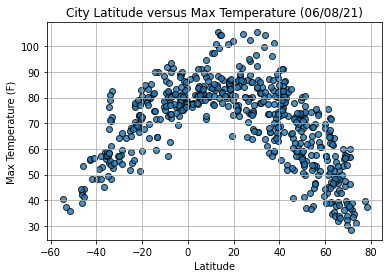

In [43]:
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude versus Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

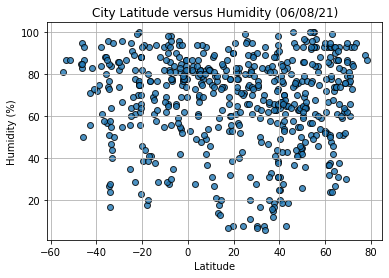

In [44]:
plt.scatter(lats,humidity, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude versus Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

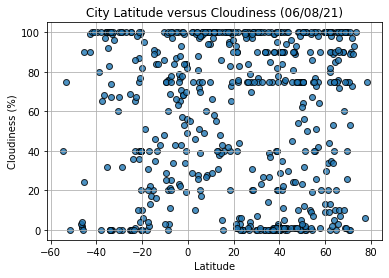

In [45]:
plt.scatter(lats,cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude versus Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

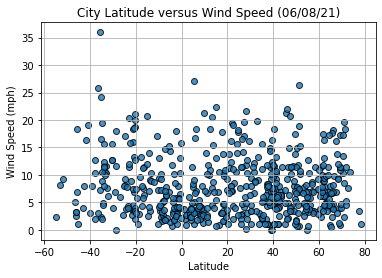

In [46]:
plt.scatter(lats,wind_speed, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude versus Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.show()

In [75]:
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,28.42,93,90,18.41,US,1623076122
1,pisco,-13.7000,-76.2167,64.45,77,90,3.44,PE,1623076452
2,arraial do cabo,-22.9661,-42.0278,76.96,78,40,11.50,BR,1623076452
3,kapaa,22.0752,-159.3190,75.52,81,75,7.00,US,1623076453
4,saint-philippe,-21.3585,55.7679,72.99,76,87,16.08,RE,1623076453
...,...,...,...,...,...,...,...,...,...
558,meulaboh,4.1363,96.1285,78.03,84,100,4.05,ID,1623076603
559,coffs harbour,-30.3000,153.1333,57.16,86,67,12.66,AU,1623076318
560,muyuka,4.2898,9.4103,91.00,60,26,3.87,CM,1623076603
561,contamana,-7.3333,-75.0167,73.71,96,100,1.77,PE,1623076603


## Linear Regression

In [113]:
import scipy.stats as st

In [135]:
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
    
print(f"r-squared: {rvalue**2}")
print(f"Correlation: {correlation}")
print(f"Line: {line_eq}")

r-squared: 0.045528263771661075
Correlation: (-0.21337353109432564, 0.00507712232745384)
Line: y = -0.09x + 6.46


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

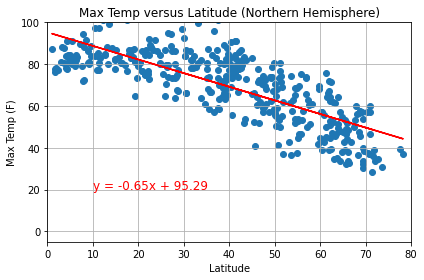

<Figure size 432x288 with 0 Axes>

In [160]:
# Create Northern and Southern Hemisphere DataFrames
mask = city_data_pd['Lat'] > 0
northern_hemisphere = city_data_pd[mask]
southern_hemisphere = city_data_pd[~mask]

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Max Temp versus Latitude (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/Fig_MaxTemp_NH.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

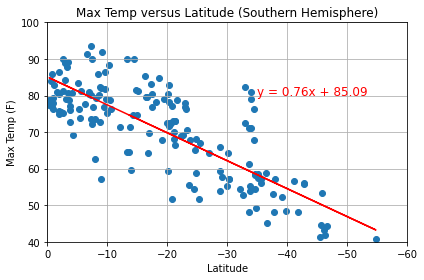

<Figure size 432x288 with 0 Axes>

In [161]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Max Temp versus Latitude (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/Fig_MaxTemp_SH.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

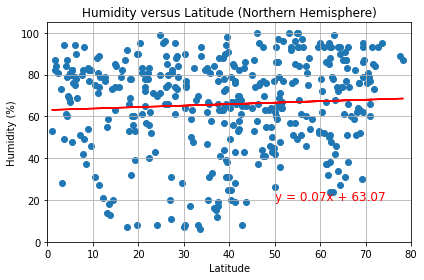

<Figure size 432x288 with 0 Axes>

In [162]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity versus Latitude (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/Fig_Humidity_NH.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

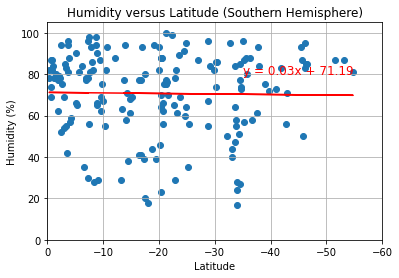

<Figure size 432x288 with 0 Axes>

In [163]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity versus Latitude (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("output_data/Fig_Humidity_SH.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

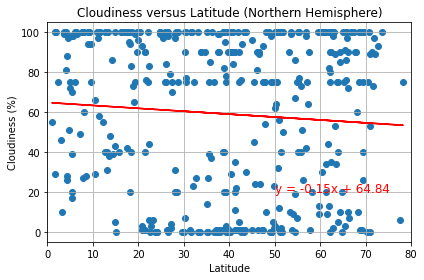

<Figure size 432x288 with 0 Axes>

In [164]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness versus Latitude (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/Fig_Cloudiness_NH.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

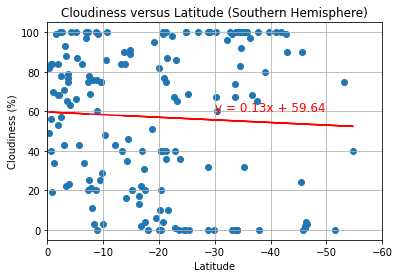

<Figure size 432x288 with 0 Axes>

In [165]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness versus Latitude (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("output_data/Fig_Cloudiness_SH.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

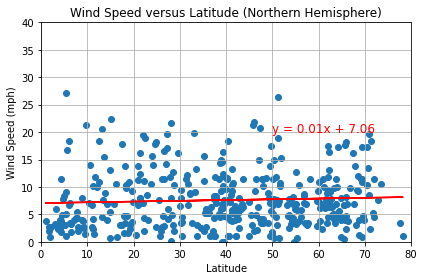

<Figure size 432x288 with 0 Axes>

In [166]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed versus Latitude (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/Fig_WindSpeed_NH.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

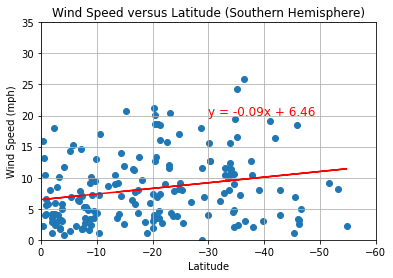

<Figure size 432x288 with 0 Axes>

In [167]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed versus Latitude (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("output_data/Fig_WindSpeed_SH.png")